# Solving Linear programming

In [22]:
from src.dataloader import DataLoader
from src.solver import solve_lp

dataloader = DataLoader()
variables, A, B, L = dataloader.load()

# Analysing Solved problems data

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
result = []
with open('result_status.txt') as f:
    for l in f.readlines():
        result.append(l.strip().split('\t'))
    
_result = [rs[:-1] for rs in result]

status_df = pd.DataFrame(_result[1:], columns = result[0])
status_df.set_index("prob_num", inplace = True)

status_df.loc[:, 'primal_objective':] = status_df.loc[:, 'primal_objective':].replace("None", np.nan).astype(float)

C:\Users\wklee\AppData\Local\Temp\ipykernel_12724\3939913755.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  status_df.loc[:, 'primal_objective':] = status_df.loc[:, 'primal_objective':].replace("None", np.nan).astype(float)


In [79]:
# How many problems solved?
status_df['status'].value_counts()

status
primal infeasible    55381
optimal              24619
Name: count, dtype: int64

<Axes: title={'center': 'Histogram of elapsed time for solving LP'}, ylabel='Frequency'>

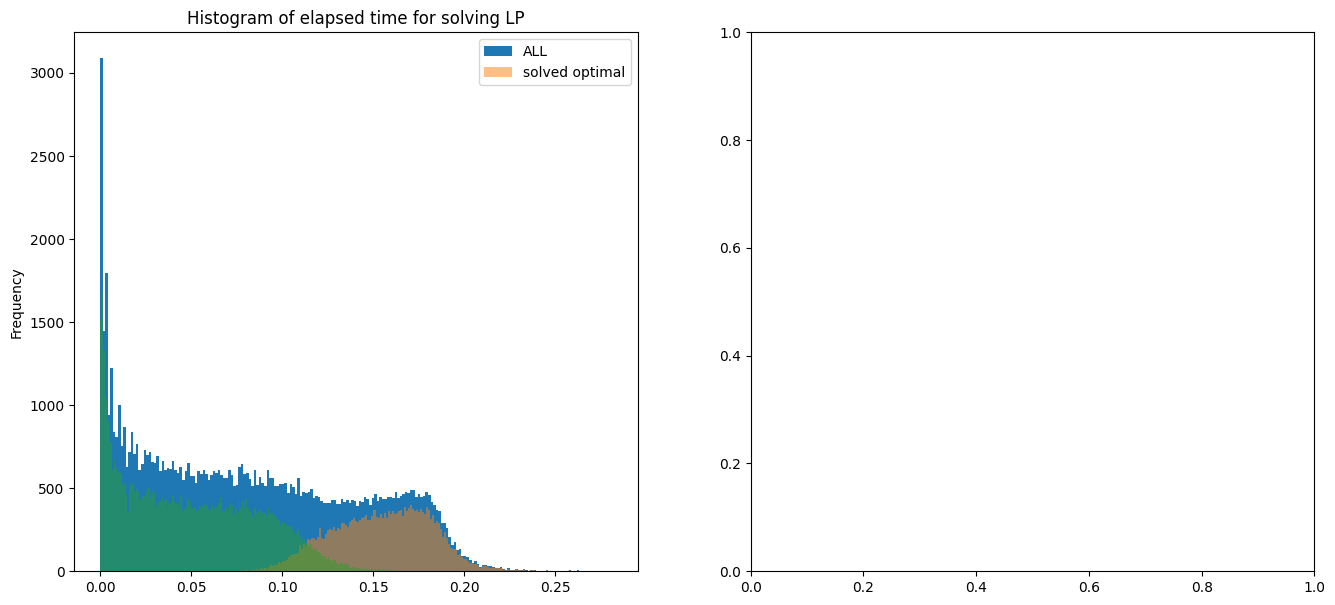

In [98]:
# How much time spent on solving problems
row, col = 1, 2
fig, ax = plt.subplots(row, col, figsize=(16, 7))

status_df['elapsed'].plot(kind='hist', bins=200, ax=ax[0])
status_df.query("status == 'optimal'")['elapsed'].plot(kind='hist', bins=200, ax=ax[0], alpha=0.5)
ax[0].legend(["ALL", "solved optimal"])
ax[0].set_title("Histogram of elapsed time for solving LP")

status_df.query("status == 'primal infeasible'")['elapsed'].plot(kind='hist', bins=200, ax=ax[0], alpha=0.5)

Text(0.5, 1.0, 'The number of problem solved while problem are being solved')

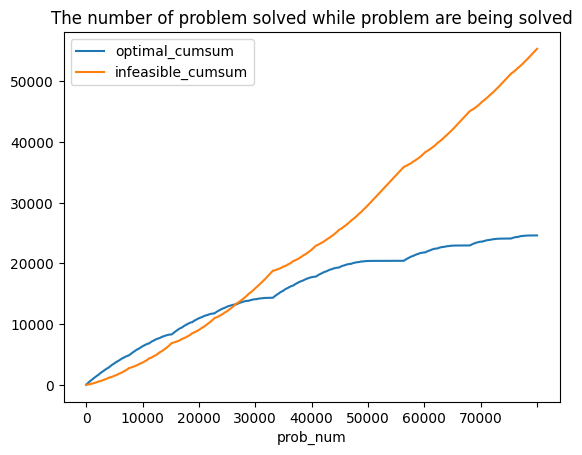

In [99]:
# Is it different solving status when computer have much burden? (The more problem solved, the difficult computer solve problem)
solved_st_df = status_df[['status']].copy()
solved_st_df['optimal'] = (solved_st_df['status'] == 'optimal') * 1
solved_st_df['infeasible'] = (solved_st_df['status'] == 'primal infeasible') * 1

solved_st_df['optimal_cumsum'] = solved_st_df['optimal'].cumsum()
solved_st_df['infeasible_cumsum'] = solved_st_df['infeasible'].cumsum()

solved_st_df[['optimal_cumsum', 'infeasible_cumsum']].plot()
plt.title("The number of problem solved while problem are being solved")

## TO-DO  

optimal한 답이 안 나온 비율이 너무 많음.  
그게 문제를 많이 풀 수록 특히 그렇진 않아보임.  


- LP를 풀 때 다른 알고리즘을 사용해 문제를 풀기  
    - 전체를 다른 알고리즘으로 다시 풀기
    - 풀지 못한 문제만 다른 알고리즘으로 풀기  

- 지금 나온 답은 robust 한가?
    - 다시 코드를 돌렸을 때 optimal/infeasible 수가 같게 나오는가?
    - optimal한 x가 달라지지 않는가?